In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
"""

@param: number of partitions in the catalog
@return: w0 and b0 in that order
 
"""

def process_plain_grid(partitions):
  w0 = []
  b0 = []
  
  for i in range(1,partitions+1):
    hdul = fits.open("./grids/dr12S_data_ex_par/W_p{i}_of_7.fits".format(i=i))
    data = hdul[1].data.field(0)
    w0 = np.concatenate((w0, data), axis=None) 

  for i in range(1,partitions+1):
    hdul = fits.open("./grids/dr12S_randoms_ex_par/B_p{i}_of_7.fits".format(i=i))
    data = hdul[1].data.field(0)
    b0 = np.concatenate((b0, data), axis=None)

  return w0, b0

In [3]:
"""

@param: number of partitions, number of sbins
@return: dictionary of concatenated W1 values

"""

def process_all_w(partitions, sbins):
  w1Bins = {}  # dict that stores info for all s bins
  for s in range(sbins+1) :
    this_sbin = "w1_s{s}".format(s=s)
    oneBin = []

    for i in range(1,partitions+1):
      hdul = fits.open("./grids/dr12S_data_ex_par/W_{k}_0_0_RE_p{i}_of_7.fits".format(k=s,i=i))
      data = hdul[1].data.field(0)
      oneBin = np.concatenate((oneBin, data), axis=None)
    w1Bins[this_sbin] = oneBin

  return w1Bins

In [4]:
"""

@param: number of partitions, number of sbins
@return: dictionary of concatenated B1 values

"""

def process_all_b(partitions, sbins):
  b1Bins = {}  # dict that stores info for all s bins
  for s in range(sbins+1) :
    this_sbin = "b1_s{s}".format(s=s)
    oneBin = []

    for i in range(1,partitions+1):
      hdul = fits.open("./grids/dr12S_randoms_ex_par/B_{k}_0_0_RE_p{i}_of_7.fits".format(k=s,i=i))
      data = hdul[1].data.field(0)
      oneBin = np.concatenate((oneBin, data), axis=None)
    b1Bins[this_sbin] = oneBin

  return b1Bins

In [5]:
"""

@param: s_index to plot, w0 from process_plain_grid, b0 from process_plain_grid, w1_dict from process_all_w
@return: none

"""
def plot_hist(s_index, w0, b0, w1_dict, b1_dict):
    toPlot_w1 = "w1_s{i}".format(i=s_index)
    toPlot_b1 = "b1_s{j}".format(j=s_index)
    w1 = w1_dict[toPlot_w1]
    b1 = b1_dict[toPlot_b1]

    w0w1 = w0 * w1
    b0b1 = b0 * b0
    b0b1_mean = np.mean(b0b1)

    normalized = w0w1/b0b1_mean

    plt.hist(normalized, 100, histtype='stepfilled', alpha=0.25, color='greenyellow', edgecolor='black', lw=2)
    plt.hist(normalized, 100, histtype='stepfilled', edgecolor='black', facecolor="None")
    plt.yscale("log")
    plt.xlabel("W0W1/<B0B1>")
    plt.ylabel("pdf")
    plt.show()

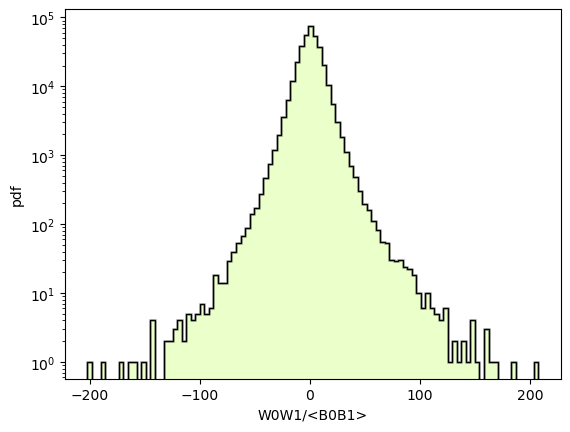

In [6]:
w0, b0 = process_plain_grid(7)
w1_dict = process_all_w(7,21)
b1_dict = process_all_b(7,21)

plot_hist(9, w0, b0, w1_dict, b1_dict)